# **New York Housing Market**
### **Проект Пономаренко Ксении**

### *Был выбран датасет, который анализирует, как различные факторы влюяют на стоимость жилья на рынке недвижимости в Нью-Йорке*

**Источник:** https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

**Цель работы:** Исследовать влияние различных факторов (названия брокерских компаний, типы домов, цены, количество спален и ванных комнат, площадь недвижимости, адреса, штаты, административные и локальные районы, названия улиц и географические координаты) на стоимость жилья в Нью-Йорке, а также построить модель, которая сможет предсказывать стоимость недвижимости на основе собранных данных.

**Будет решаться задача регрессии:**

* построить модель, которая в результате изучения ряда характеристик (например: типы домов, цены, количество спален и ванных комнат и т.д.) будет предсказывать цену на объект недвижимости в Нью-Йорке
* выявить ключевые факторы, оказывающие наибольшее влияние на стоимость жилья в Нью-Йорке

**Таргетная переменная:** PRICE

*Датасет был обновлен год назад, поэтому данные можно считать актуальными для изучения.*

**Краткая информация о каждом столбце датасета:**

1. BROKERTITLE: Название брокерской компании
2. TYPE: Тип дома
3. PRICE: Стоимость дома
4. BEDS: Количество спален
5. BATH: Количество ванных комнат
6. PROPERTYSQFT: Квадратные метры объекта недвижимости
7. ADDRESS: Полный адрес дома
8. STATE: Состояние дома
9. MAIN_ADDRESS: Информация об основном адресе
10. ADMINISTRATIVE_AREA_LEVEL_2: Информация об административном районе 2-го уровня
11. LOCALITY: Область
12. SUBLOCALITY: Район
13. STREET_NAME: Название улицы
14. LONG_NAME: Длина названия улицы
15. FORMATTED_ADDRESS: Форматированный адрес
16. LATITUDE: Координаты дома по широте
17. LONGITUDE: Координаты дома по долготе

*Датасет включает в себя 4801 строку и 17 столбцов, что является достаточным для того, чтобы решить поставленную задачу.* 

### 1. Загрузка необходимых библиотек

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno
from scipy import stats
import category_encoders as ce
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression

from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 2. Загрузка данных

In [7]:
df = pd.read_csv('NY-House-Dataset.csv')

### 3. Анализ датасета, основные статистики, визуализация данных¶


In [9]:
df.shape

(4801, 17)

In [10]:
df.head(5)

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [11]:
df.tail(5)

BROKERTITLE            TYPE    PRICE  \
4796                            Brokered by COMPASS  Co-op for sale   599000   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale   245000   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale  1275000   
4799        Brokered by E Realty International Corp  Condo for sale   598125   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale   349000   

      BEDS  BATH  PROPERTYSQFT                    ADDRESS  \
4796     1   1.0   2184.207862       222 E 80th St Apt 3A   
4797     1   1.0   2184.207862        97-40 62 Dr Unit Lg   
4798     1   1.0   2184.207862  427 W 21st St Unit Garden   
4799     2   1.0    655.000000   91-23 Corona Ave Unit 4G   
4800     1   1.0    750.000000    460 Neptune Ave Apt 14O   

                    STATE                                 MAIN_ADDRESS  \
4796  Manhattan, NY 10075      222 E 80th St Apt 3AManhattan, NY 10075   
4797  Rego Park, NY 11374       97-40 62 Dr Unit LgRego Park, NY 11374   
4798   New York, NY 10011  427 W 21st St Unit GardenNew York, NY 10011   
4799   Elmhurst, NY 11373   91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800   Brooklyn, NY 11224    460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York  New York County   
4799                    New York    Queens County           Queens   
4800                    New York     Kings County         Brooklyn   

       STREET_NAME         LONG_NAME  \
4796     Manhattan               222   
4797        Queens        62nd Drive   
4798      New York  West 21st Street   
4799      Flushing             91-23   
4800  Coney Island               460   

                                   FORMATTED_ADDRESS   LATITUDE  LONGITUDE  
4796      222 E 80th St #3a, New York, NY 10075, USA  40.774350 -73.955879  
4797         97-40 62nd Dr, Rego Park, NY 11374, USA  40.732538 -73.860152  
4798          427 W 21st St, New York, NY 10011, USA  40.745882 -74.003398  
4799  91-23 Corona Ave. #4b, Flushing, NY 11373, USA  40.742770 -73.872752  
4800   460 Neptune Ave #14a, Brooklyn, NY 11224, USA  40.579147 -73.970949

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

Имеем данные типа: object - 11 шт (текстовые данные) , int64 и float64 - 6 шт (числовые данные)

In [14]:
df.duplicated().sum()

214

**Вывод:** данные имеют дубликаты

Удаляем дубликаты:

In [16]:
df.drop_duplicates(inplace=True)

*Снова проверяем наличие дубликатов:*

In [18]:
df.duplicated().sum()

0

**Вывод:** данные не имеют дубликатов

**Проверяем данные на пропуски:**

In [21]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Вывод:** в данных нет пропусков 

In [23]:
df.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.587000e+03  4587.000000  4587.000000   4587.000000  4587.000000   
mean   2.381172e+06     3.365816     2.377735   2177.712426    40.713932   
std    3.206831e+07     2.628808     1.968503   2283.095559     0.087738   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.638588   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726667   
75%    1.498500e+06     4.000000     3.000000   2184.207862    40.771913   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4587.000000  
mean    -73.941584  
std       0.101276  
min     -74.253033  
25%     -73.987420  
50%     -73.949116  
75%     -73.869455  
max     -73.702450

In [24]:
df.describe(include = 'object')

BROKERTITLE            TYPE               ADDRESS  \
count                  4587            4587                  4587   
unique                 1036              13                  4582   
top     Brokered by COMPASS  Co-op for sale  310-312 Hillside Ave   
freq                    435            1388                     2   

                     STATE                                 MAIN_ADDRESS  \
count                 4587                                         4587   
unique                 308                                         4583   
top     Brooklyn, NY 11235  310-312 Hillside AveStaten Island, NY 10304   
freq                    99                                            2   

       ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY SUBLOCALITY STREET_NAME  \
count                         4587      4587        4587        4587   
unique                          29        11          21         174   
top                  United States  New York    New York   Manhattan   
freq                          2374      2395         967         930   

       LONG_NAME                            FORMATTED_ADDRESS  
count       4587                                         4587  
unique      2731                                         4550  
top            2  67-66 108th St, Forest Hills, NY 11375, USA  
freq          19                                            3

### **Построим график таргетной переменной (гистограмма):**

In [26]:
fig = px.histogram(np.log(df.PRICE))

fig.update_layout(
    title={
        'text': "Гистограмма логарифма цены",  
        'font': {'size': 20, 'family': 'Arial'},  
        'x': 0.5  
    },
    xaxis_title={
        'text': "Логарифм цены",
        'font': {'size': 16, 'family': 'Arial'}
    },
    yaxis_title={
        'text': "Частота",
        'font': {'size': 16, 'family': 'Arial'}
    },
    font={
        'family': "Times New Roman", 
        'size': 14,
        'color': "black"
    }
)

fig.show()

#Здесь я строю логорифм цены, так как есть очень большие числа


**Вывод:** большинство объектов недвижимости стоят в диапазоне от 13.5 до 13.6 

*Изучим распределение типов объектов недвижимости в Нью-Йорке:*

In [29]:
df['TYPE'].nunique()

13

In [30]:
df['TYPE'].value_counts()

TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [31]:
type = df['TYPE'].value_counts()
type

TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [32]:
type.index

Index(['Co-op for sale', 'House for sale', 'Condo for sale',
       'Multi-family home for sale', 'Townhouse for sale', 'Pending',
       'Contingent', 'Land for sale', 'For sale', 'Foreclosure',
       'Condop for sale', 'Coming Soon', 'Mobile house for sale'],
      dtype='object', name='TYPE')

In [33]:
type.values

array([1388,  966,  842,  699,  288,  229,   87,   47,   20,   14,    4,
          2,    1])

In [34]:
plt.pie(type.values, autopct = '%.2f%%'); 
plt.legend(type.index, bbox_to_anchor = (1.0, 1.0));

**Вывод:** практически 1/3 от всех типов объектов недвижимости занимают "кооперативные квартиры"; 1/5 занимают объкты недвижимости, которые только поступят в продажу, за ними следуют "мобильные дома" и "многоквартирные дома на несколько семей".

*Изучим взаимосвясь типа недвижимости и количества спален в объекте недвижимости:*

In [37]:
sns.boxplot(x=df['BEDS'], y = df['TYPE'], palette='Blues');

**Вывод:** тип недвижимости сильно влияет на распределение количества спален. Более просторные дома, такие как "Multi-family home for sale", имеют большое количество спален, в то время как кондоминиумы и мобильные дома ограничены небольшим числом спален. У некоторых типов, таких как "House for sale" или "Multi-family home for sale", есть значительные выбросы, свидетельствующие о редких объектах с большим числом спален (более 20–30). 

### **Построим матрицу корреляций**

In [40]:
df.select_dtypes(include = 'number').columns

Index(['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [41]:
nums = df.select_dtypes(include = 'number').columns

In [42]:
df[nums].corr()

PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.051823  0.078607      0.115797 -0.021103  -0.054685
BEDS          0.051823  1.000000  0.777054      0.442687 -0.058008  -0.006831
BATH          0.078607  0.777054  1.000000      0.509551 -0.050262  -0.071318
PROPERTYSQFT  0.115797  0.442687  0.509551      1.000000  0.023820  -0.043950
LATITUDE     -0.021103 -0.058008 -0.050262      0.023820  1.000000   0.515180
LONGITUDE    -0.054685 -0.006831 -0.071318     -0.043950  0.515180   1.000000

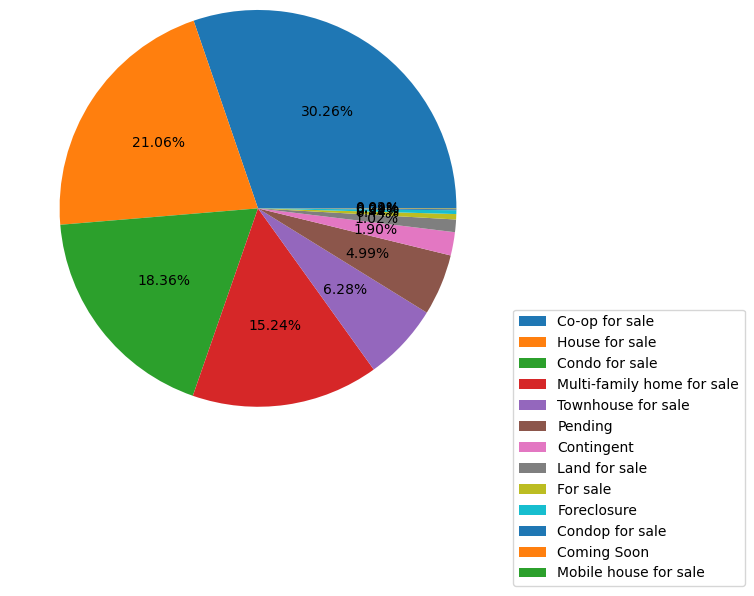

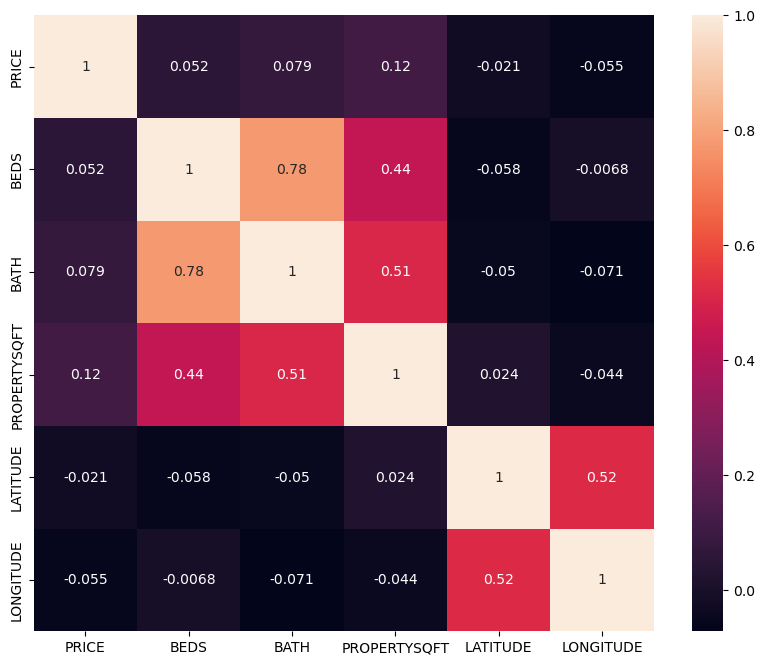

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), annot = True);
plt.show()

**Вывод:** можно увидеть, что количество квадратных метров в большей степени влияет на цену объекта недвижимости

### **Срезы данных:**

*1. Выделим все дома в Нью-Йорке с ценой выше $500,000:*

In [47]:
ny_expensive_houses = df[df['STATE'] == 'NY']
ny_expensive_houses = ny_expensive_houses[ny_expensive_houses['PRICE'] > 500000]
ny_expensive_houses
ny_expensive_houses.shape[0]

0

*2. Выделим все дома с определенным типом недвижимости и количеством спален больше 3:*

In [49]:
large_houses = df[(df['BEDS'] > 3) & (df['TYPE'] == 'House for sale')]
large_houses
large_houses.shape[0]

407

### **Построим pairplot**

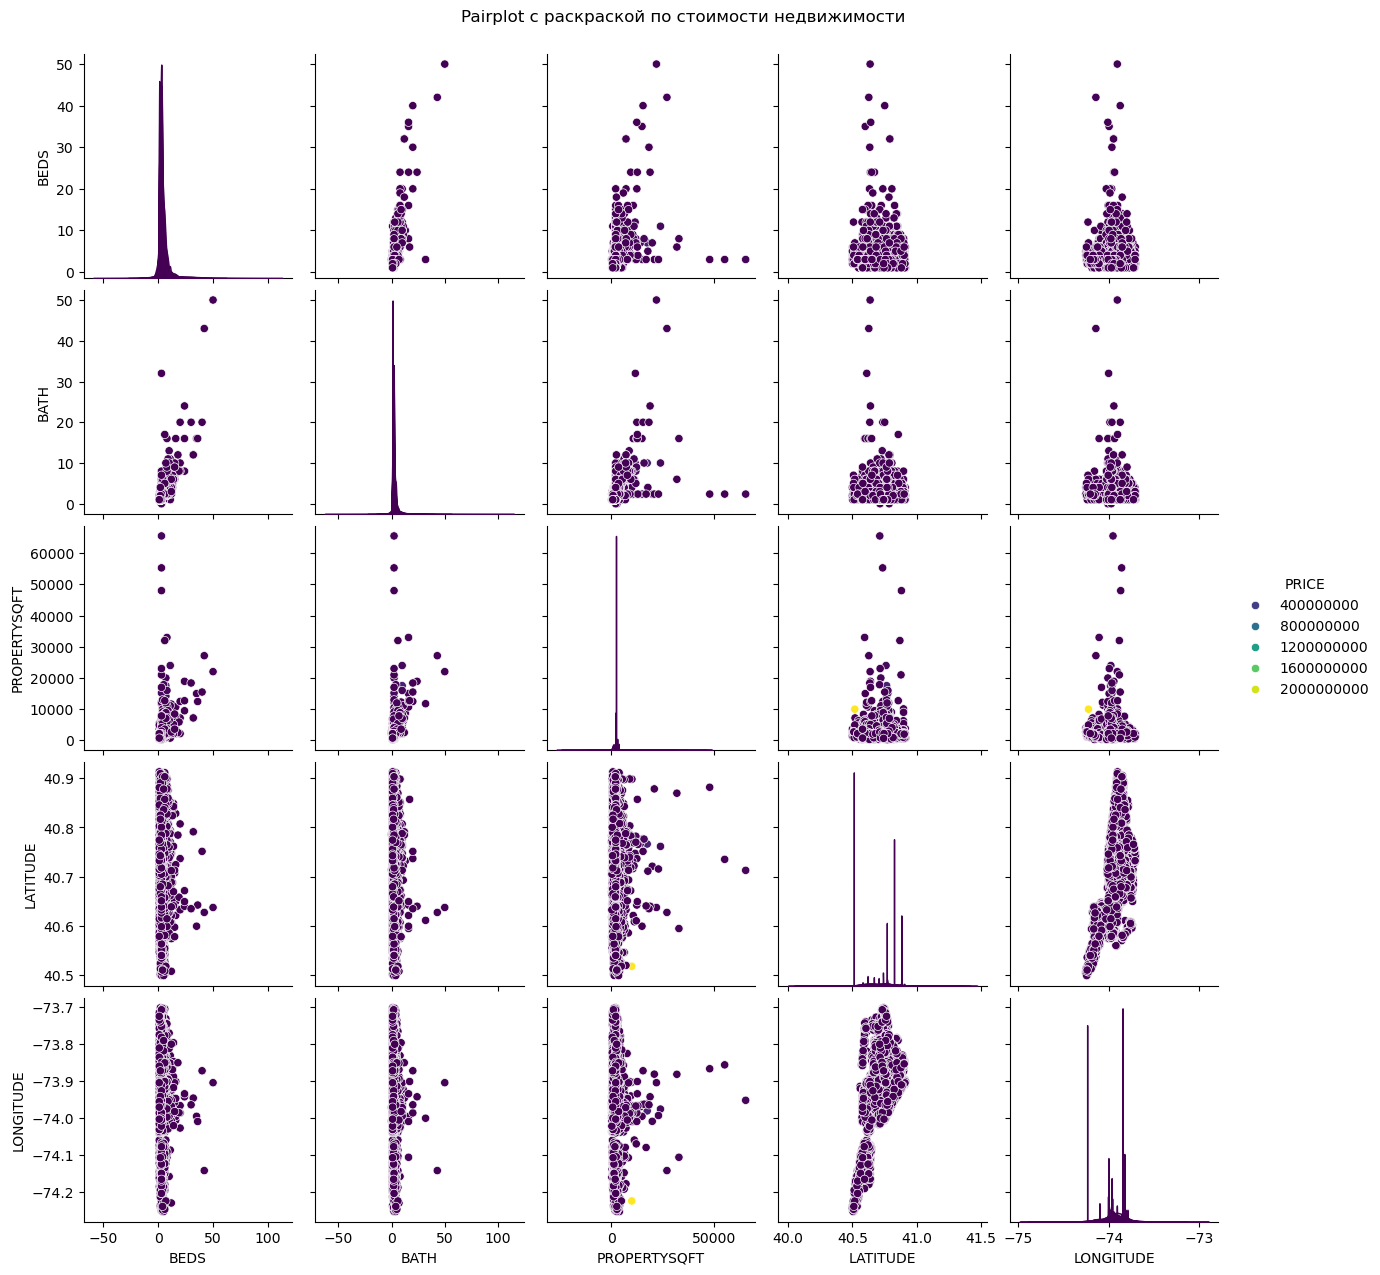

In [51]:
sns.pairplot(df, hue='PRICE', palette='viridis', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot с раскраской по стоимости недвижимости', y=1.02)  
plt.show() 

## 2 и 3 этапы

### Снова проверяем датасет на наличие пропусков:

In [54]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Выяснили, что пропусков в данных нет**



**Сами создаём пропуски в данных. Пропуски будут в двух столбцах "Количество спален" и "Квадратные метры объекта недвижимости"**

In [57]:
def make_nans(col, rs):
    indices_to_remove = df.sample(frac=0.1, random_state=rs).index
    df.loc[indices_to_remove, col] = np.nan

In [58]:
columns = ["PROPERTYSQFT", "BEDS", "LONG_NAME"]
for i, col in enumerate(columns):
    rs = 42
    make_nans(col, rs+i)

In [59]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Пропущенных значений', 1 : '% от общего количества'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% от общего количества', ascending=False).round(1)

    print ("В датасете " + str(df.shape[1]) + " колонок.\n"      
        "В " + str(mis_val_table_ren_columns.shape[0]) +
          " колонках есть пропущенные значения.")

    return mis_val_table_ren_columns

In [60]:
df_missing = missing_values_table(df)
df_missing

В датасете 17 колонок.
В 3 колонках есть пропущенные значения.


Пропущенных значений  % от общего количества
BEDS                           459                    10.0
PROPERTYSQFT                   459                    10.0
LONG_NAME                      459                    10.0

### Обнаружение недостающих данных визуально с помощью библиотеки Missingno

In [62]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

In [252]:
msno.bar(df)

<Axes: >

**Гистограмма дает краткий графический обзор полноты набора данных. Мы видим, что в столбцах PROPERTYSQFT и BEDS отсутствуют значения.**

### Визуализация местоположения недостающих данных


In [256]:
msno.matrix(df)

<Axes: >

*Спарклайн справа дает представление об общей форме полноты данных и указывает количество столбцов без пропусков (15) и общее количество столбцов (17).*

**Также можно извлечь подвыборку из всего набора данных, чтобы определить точное местоположение пропущенных значений. Проверим первые 100 строк.**

In [69]:
msno.matrix(df.head(100))

<Axes: >

In [70]:
sorted = df.sort_values('BEDS')
msno.matrix(sorted)

<Axes: >

In [71]:
msno.heatmap(df)

<Axes: >

In [72]:
from sklearn.impute import SimpleImputer

 **Заполним столбцы BEDS и PROPERTYSQFT (числовые данные) средним значением**

In [74]:
df['BEDS'].fillna(df['BEDS'].mean(), inplace=True)
df['PROPERTYSQFT'].fillna(df['PROPERTYSQFT'].mean(), inplace=True)

**Заполним столбец LONG_NAME (категориальные данные) модой**

In [76]:
df['LONG_NAME'].fillna(df['LONG_NAME'].mode()[0], inplace=True)

**Проверяем наличие пропусков после их заполнения**

In [78]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Все пропуски были заполнены. Это обеспечивает полноту данных и их корректность**

### **Выявление и обработка выбросов:**

In [81]:
df.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.587000e+03  4587.000000  4587.000000   4587.000000  4587.000000   
mean   2.381172e+06     3.368944     2.377735   2175.076593    40.713932   
std    3.206831e+07     2.537168     1.968503   2211.304452     0.087738   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1280.000000    40.638588   
50%    8.250000e+05     3.000000     2.000000   2175.076593    40.726667   
75%    1.498500e+06     4.000000     3.000000   2184.207862    40.771913   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4587.000000  
mean    -73.941584  
std       0.101276  
min     -74.253033  
25%     -73.987420  
50%     -73.949116  
75%     -73.869455  
max     -73.702450

*Определим наличие выбросов в столбце **PRICE** с использованием IQR (межквартильного размаха)*

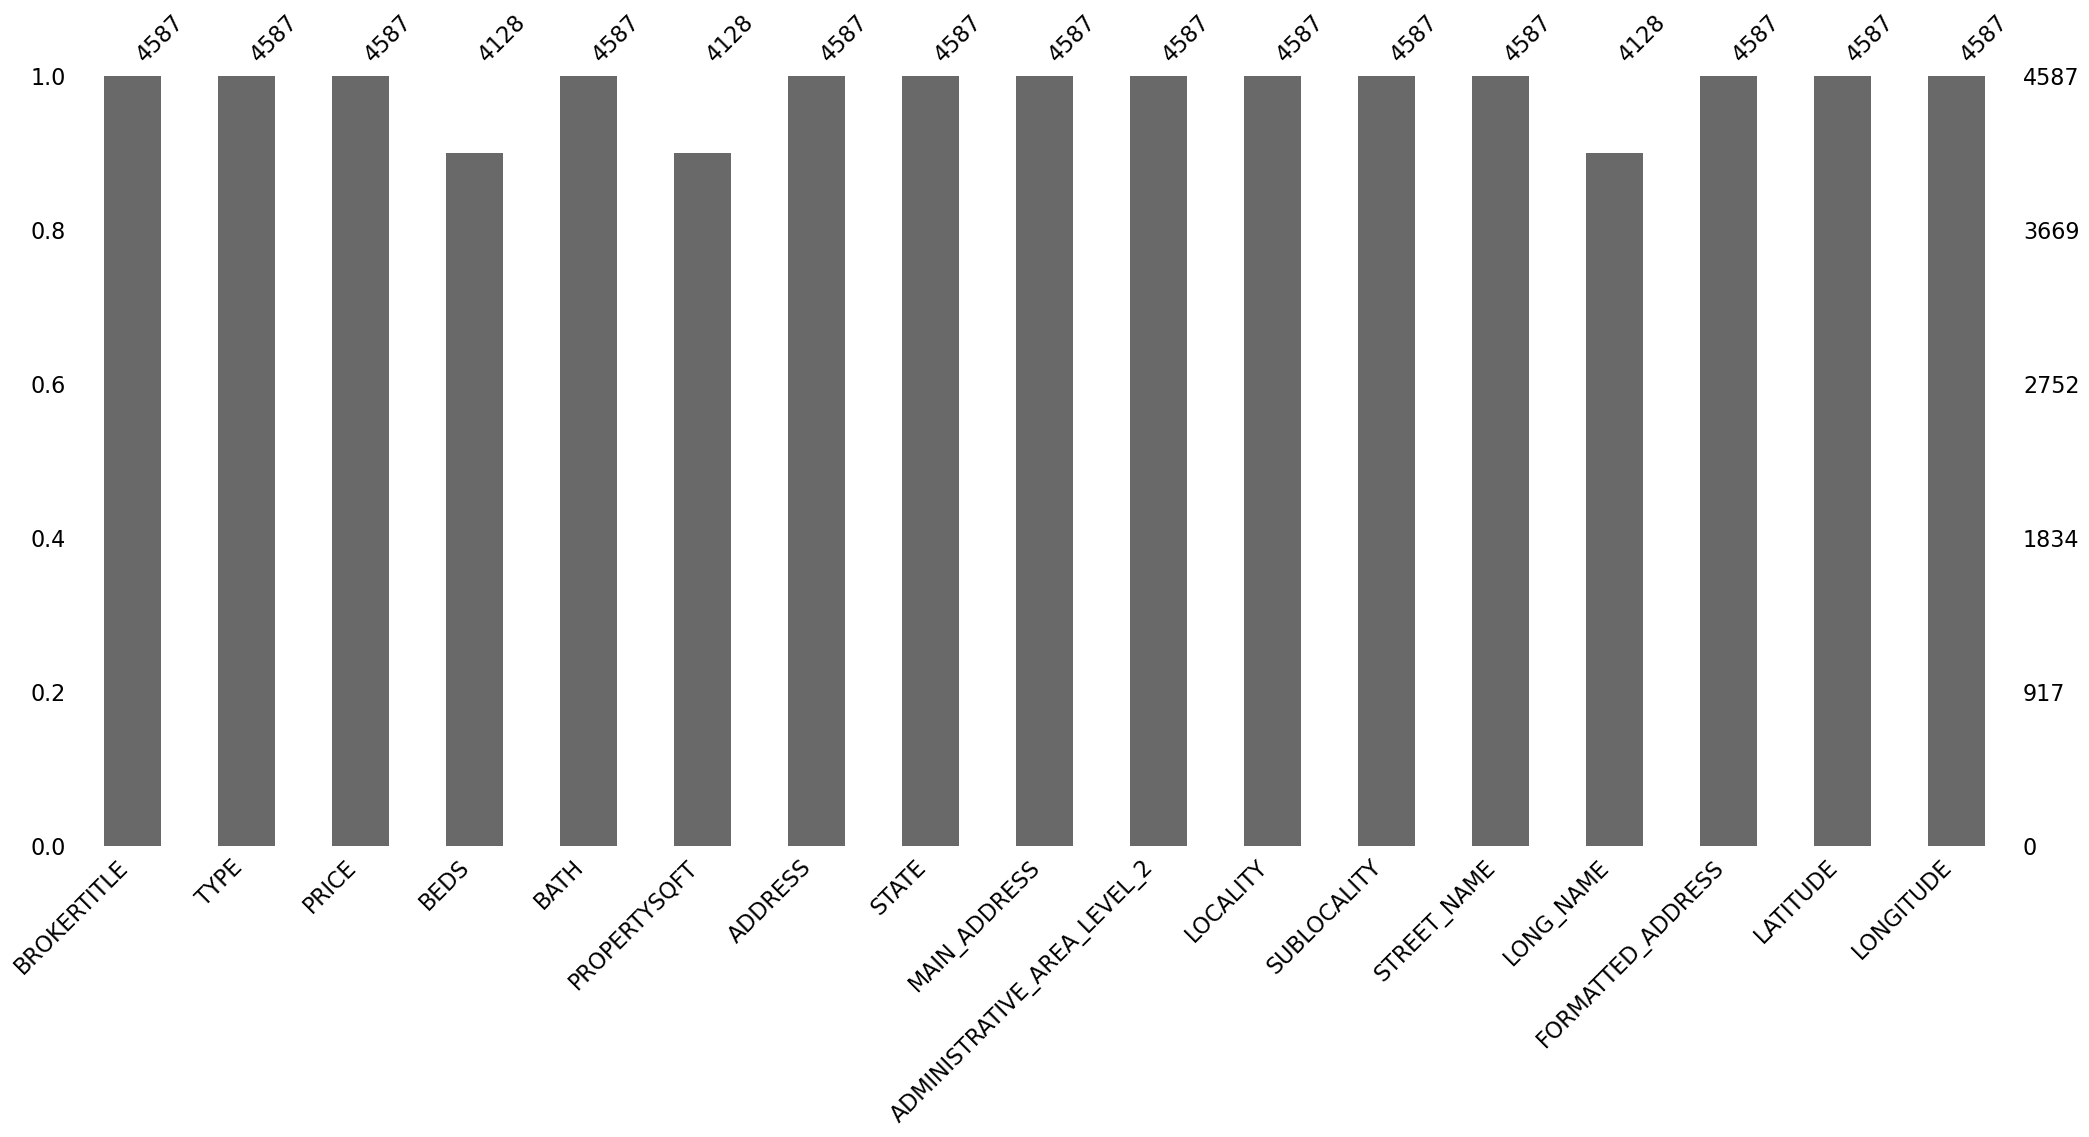

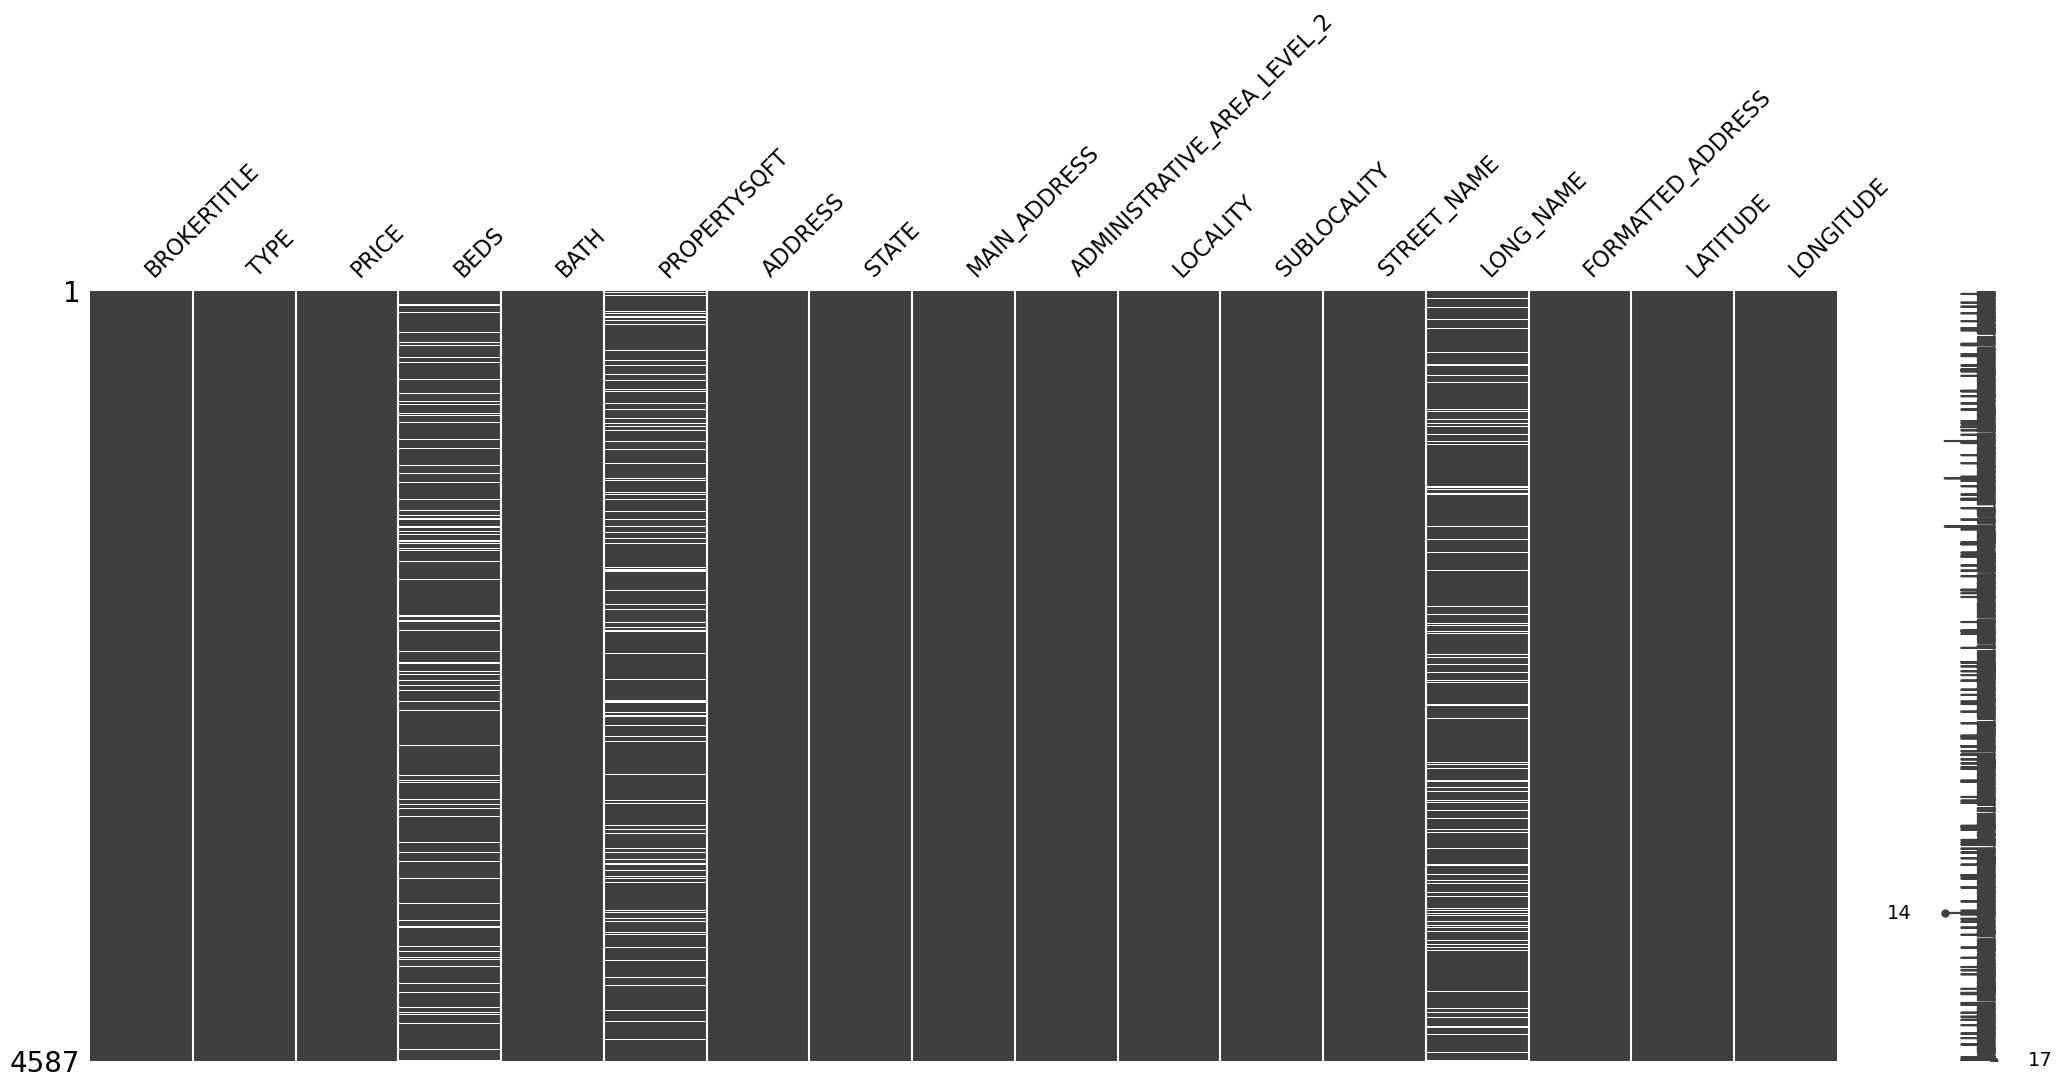

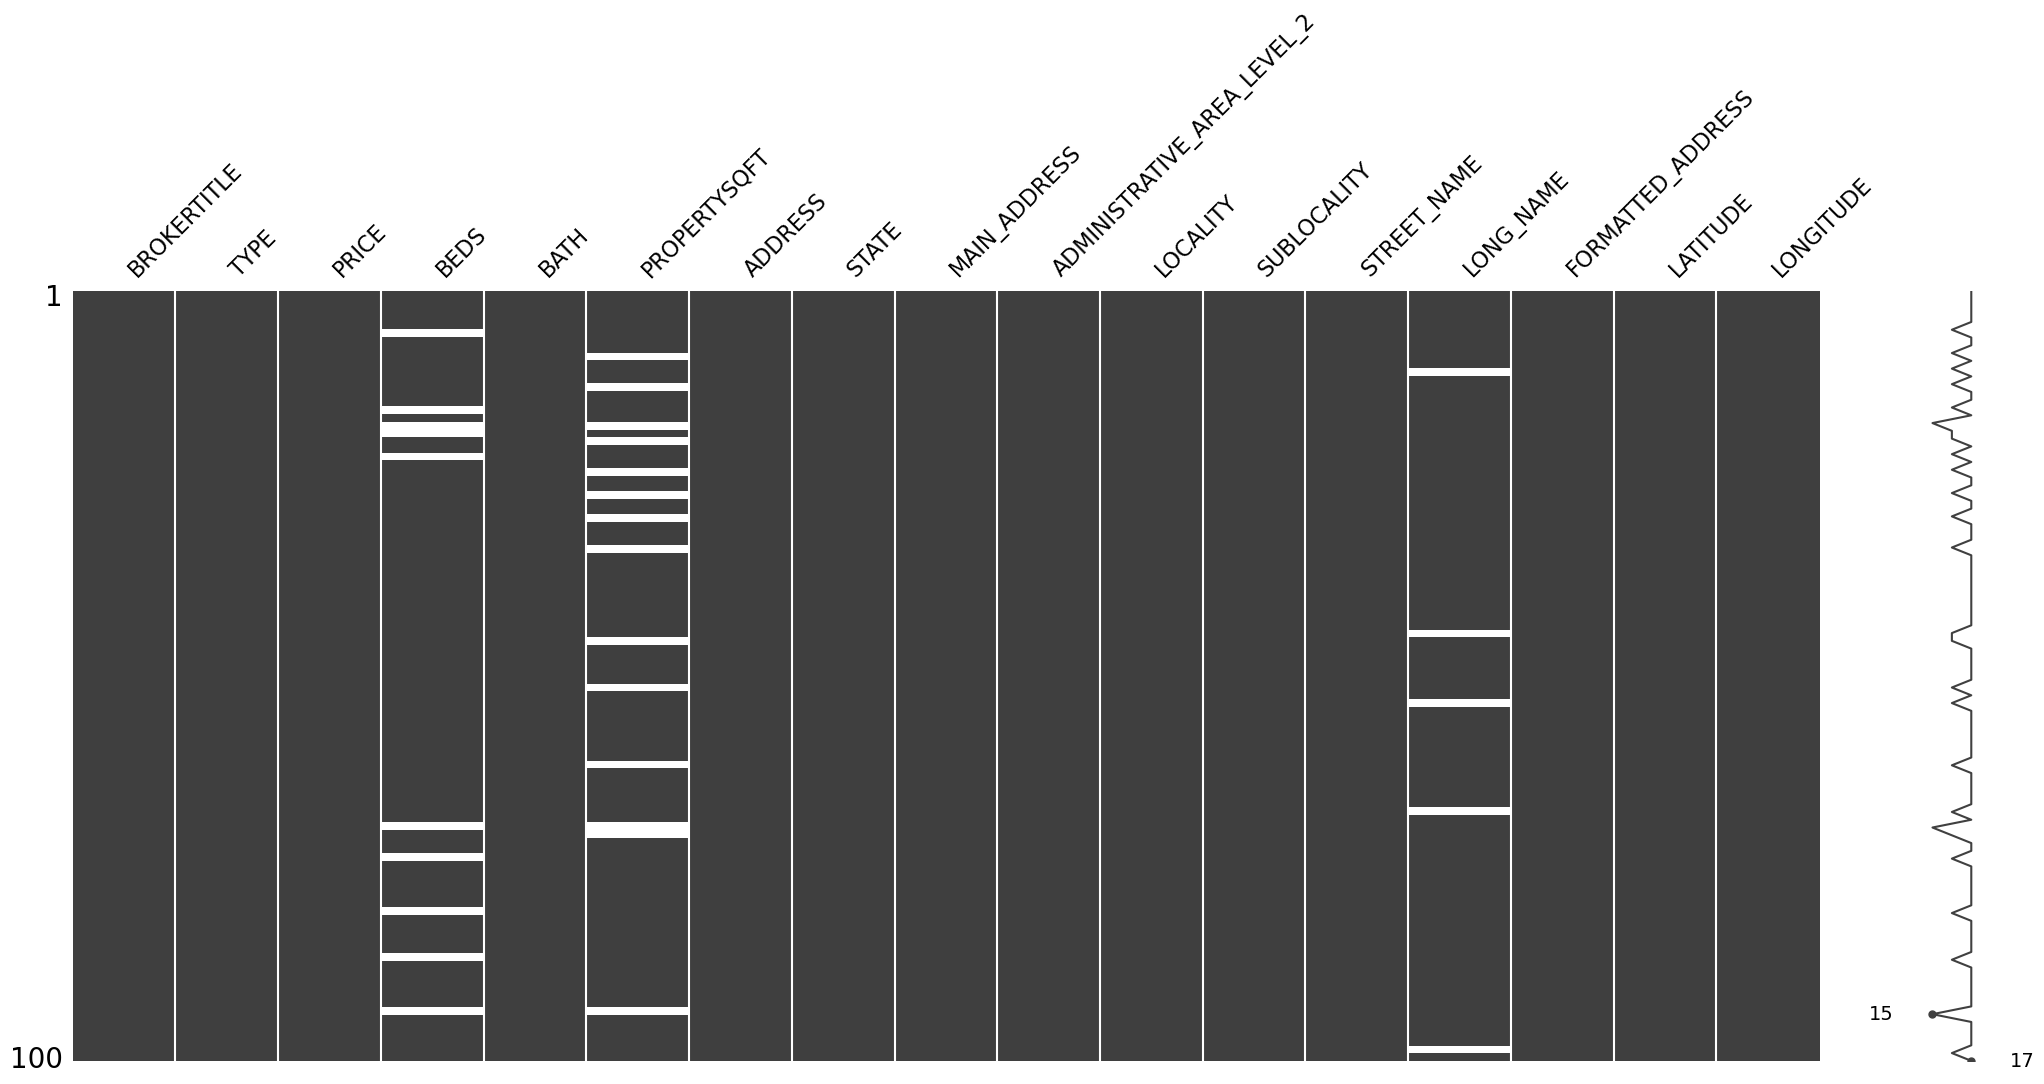

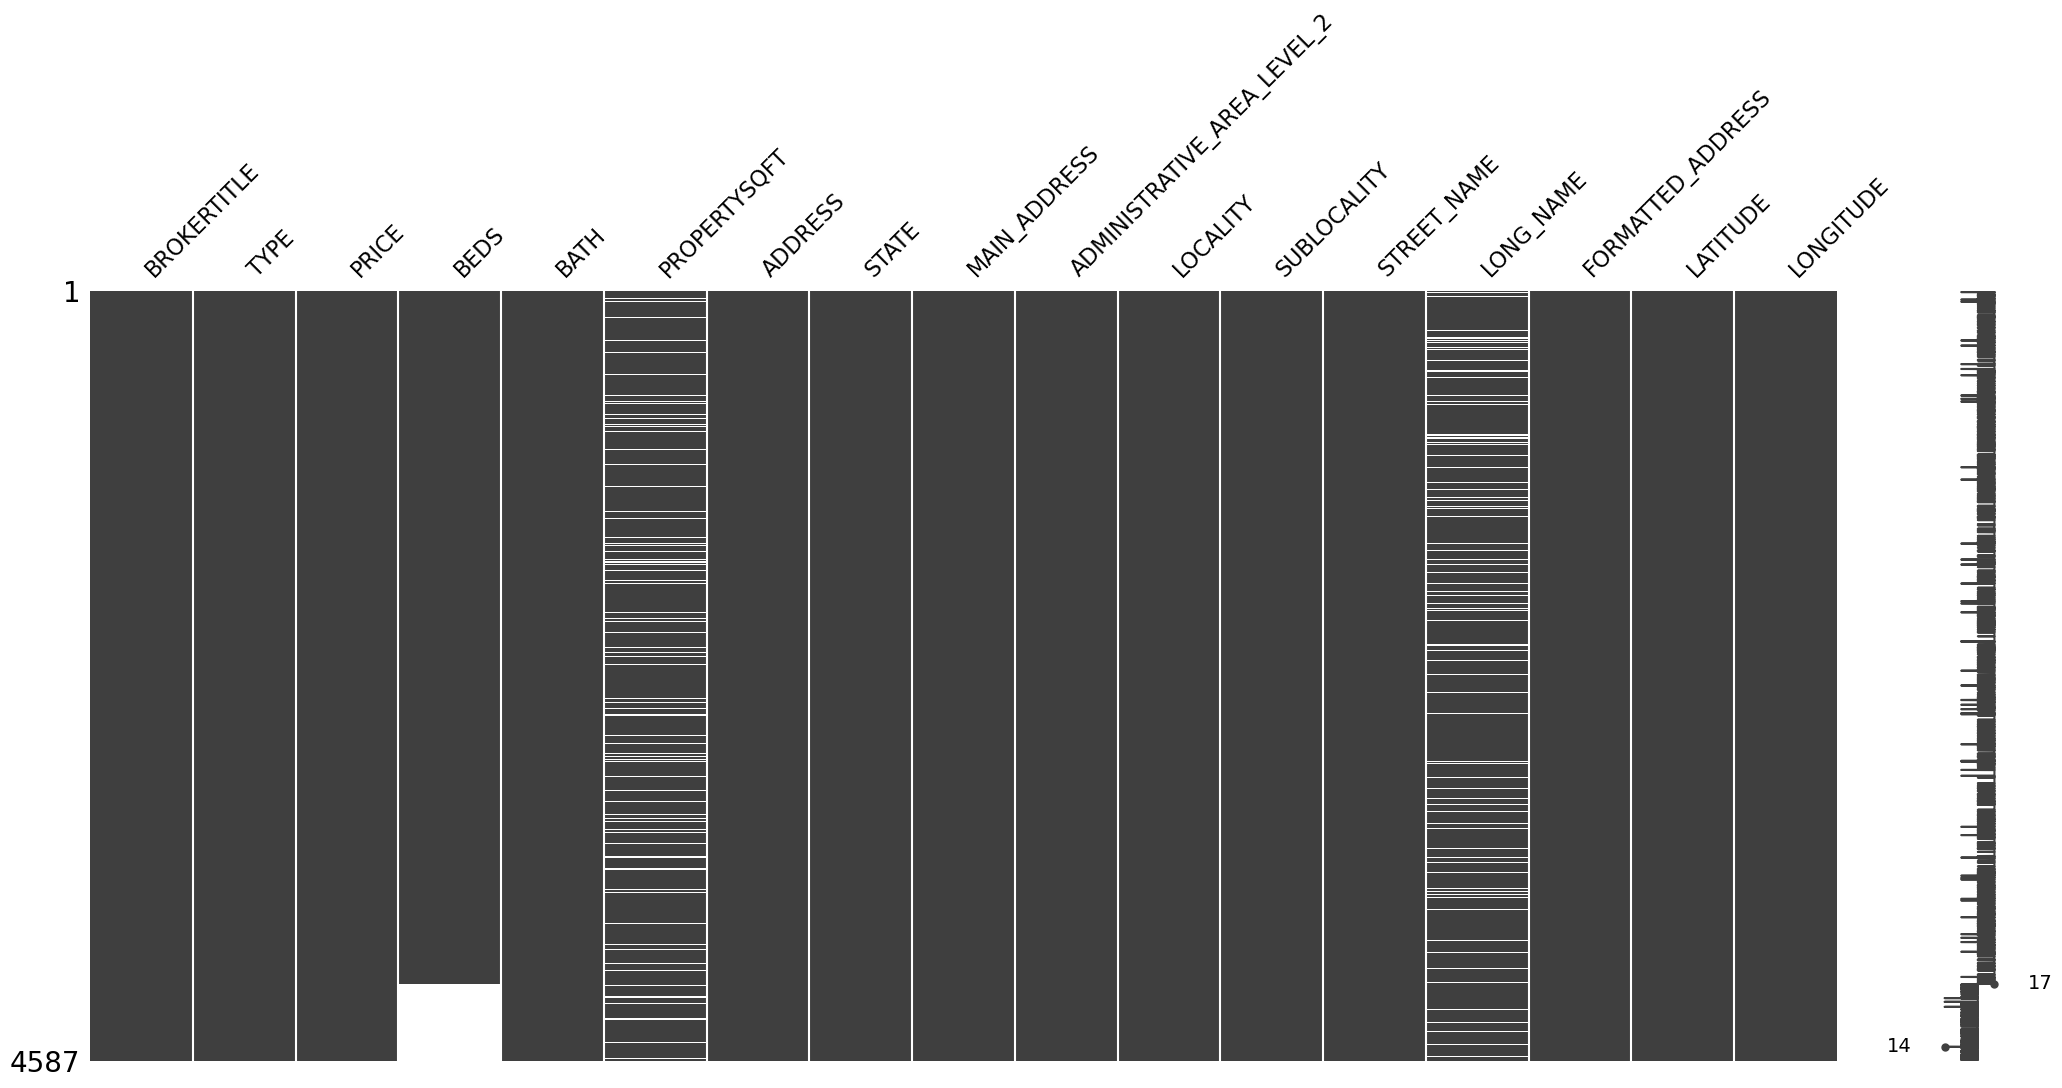

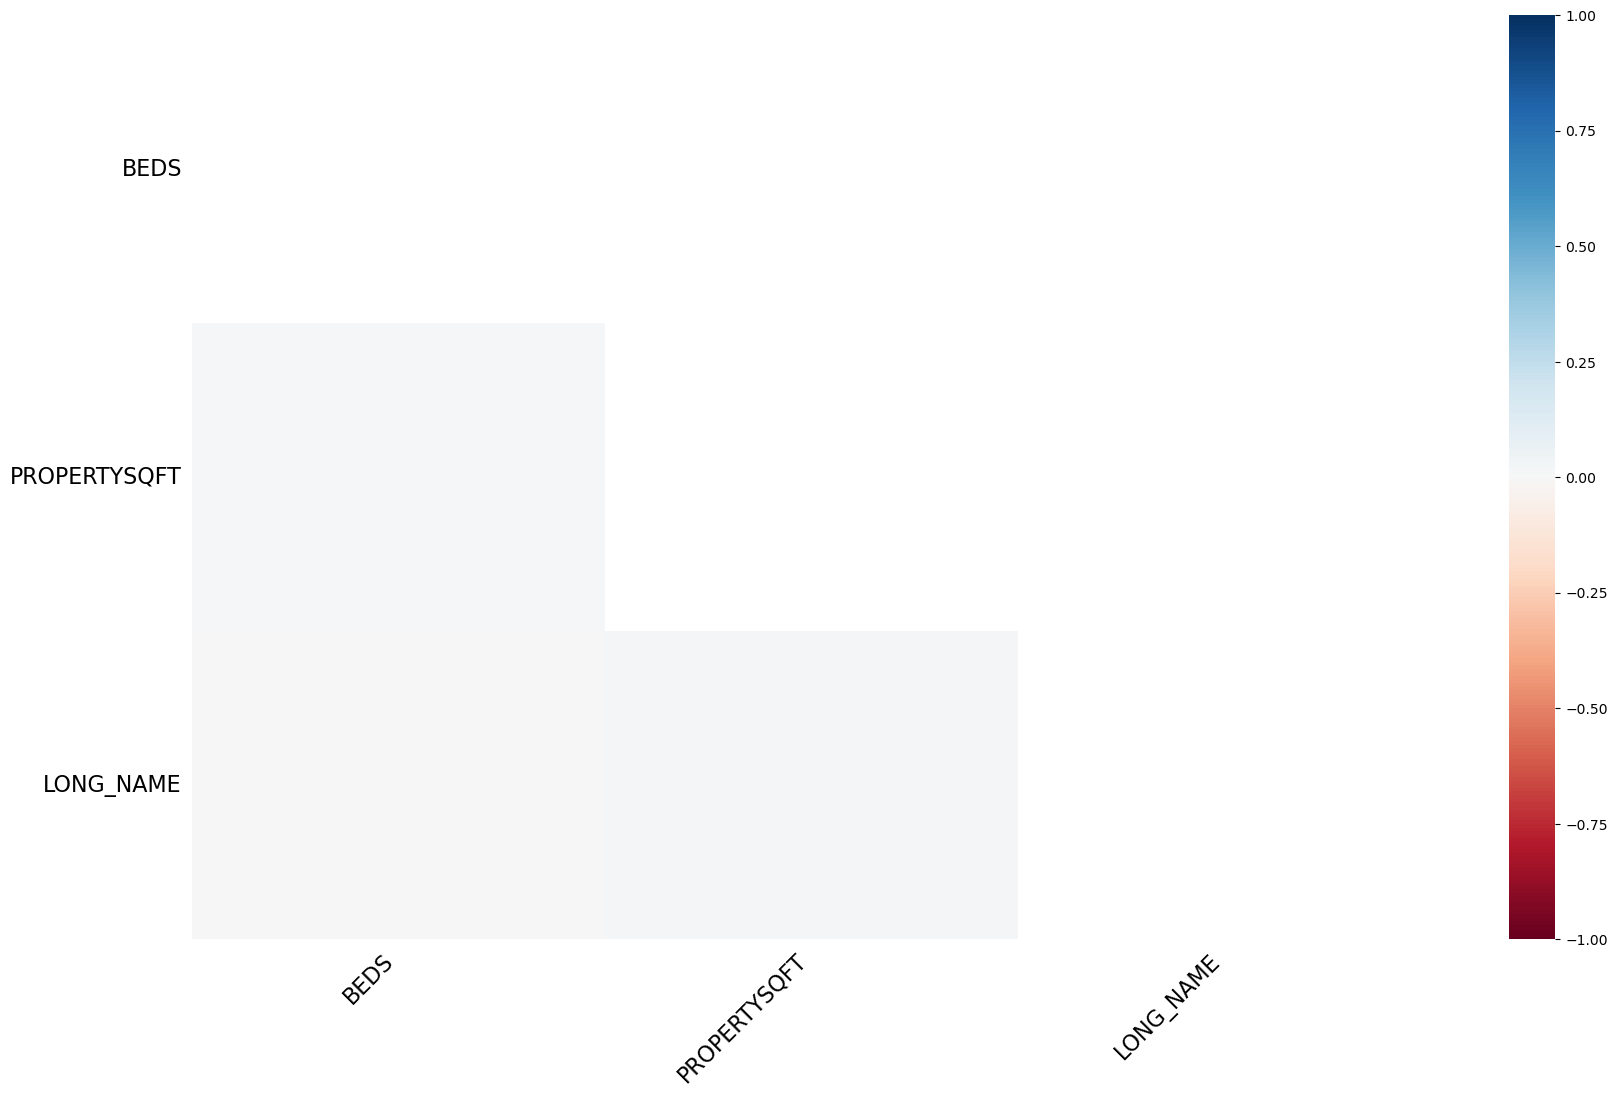

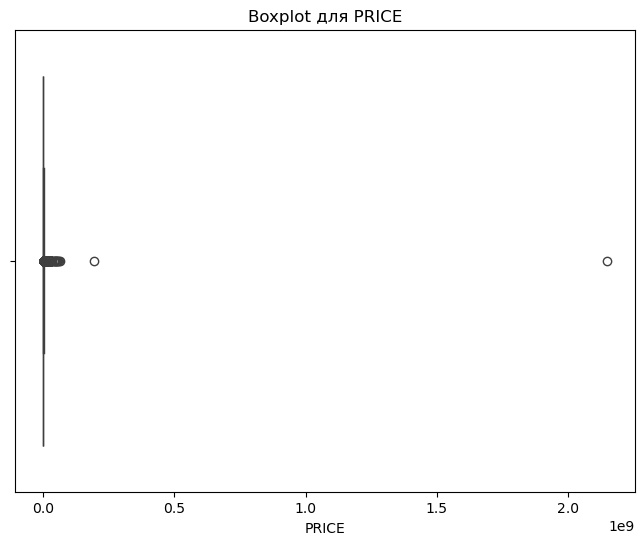

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['PRICE'])
plt.title('Boxplot для PRICE')
plt.show()

In [84]:
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [85]:
outliers_price = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)]
print(f"Число выбросов в PRICE: {outliers_price.shape[0]}")

Число выбросов в PRICE: 528


*Определим наличие выбросов в столбце **BEDS** с использованием IQR (межквартильного размаха)*



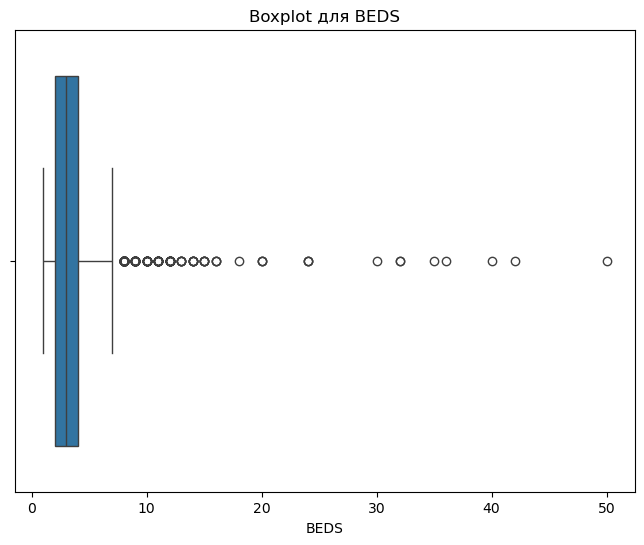

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['BEDS'])
plt.title('Boxplot для BEDS')
plt.show()

In [88]:
Q1 = df['BEDS'].quantile(0.25)
Q3 = df['BEDS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [89]:
outliers_beds = df[(df['BEDS'] < lower_bound) | (df['BEDS'] > upper_bound)]
print(f"Число выбросов в BEDS: {outliers_beds.shape[0]}")

Число выбросов в BEDS: 195


*Определим наличие выбросов в столбце **BATH** с использованием IQR (межквартильного размаха)*



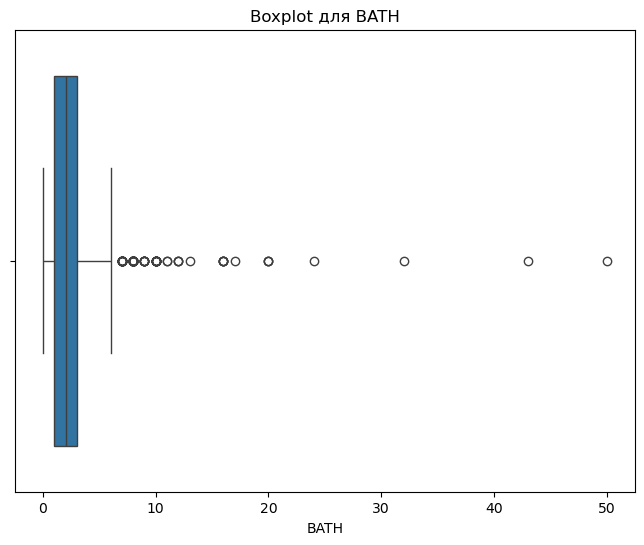

In [91]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['BATH'])
plt.title('Boxplot для BATH')
plt.show()

In [92]:
Q1 = df['BATH'].quantile(0.25)
Q3 = df['BATH'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [93]:
outliers_bath = df[(df['BATH'] < lower_bound) | (df['BATH'] > upper_bound)]
print(f"Число выбросов в BATH: {outliers_bath.shape[0]}")

Число выбросов в BATH: 108


*Определим наличие выбросов в столбце **PROPERTYSQFT** с использованием IQR (межквартильного размаха)*

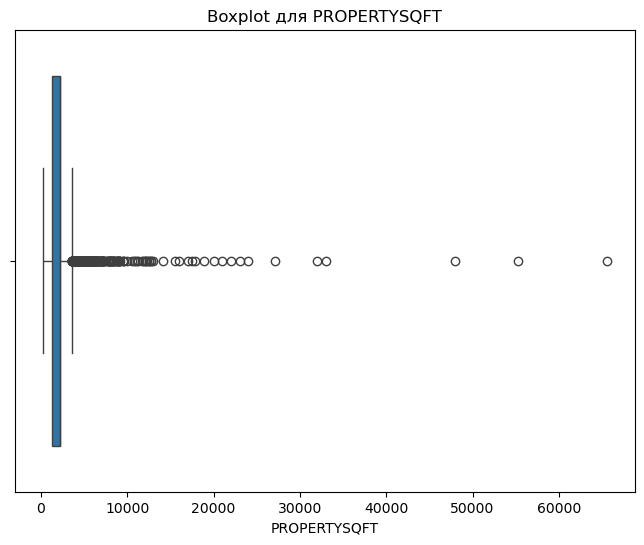

In [95]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['PROPERTYSQFT'])
plt.title('Boxplot для PROPERTYSQFT')
plt.show()

In [96]:
Q1 = df['PROPERTYSQFT'].quantile(0.25)
Q3 = df['PROPERTYSQFT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [97]:
outliers_propertysqft = df[(df['PROPERTYSQFT'] < lower_bound) | (df['PROPERTYSQFT'] > upper_bound)]
print(f"Число выбросов в PROPERTYSQFT: {outliers_propertysqft.shape[0]}")

Число выбросов в PROPERTYSQFT: 356


*Определим наличие выбросов в столбце **LATITUDE** с использованием Z-оценки*

In [99]:
from scipy import stats

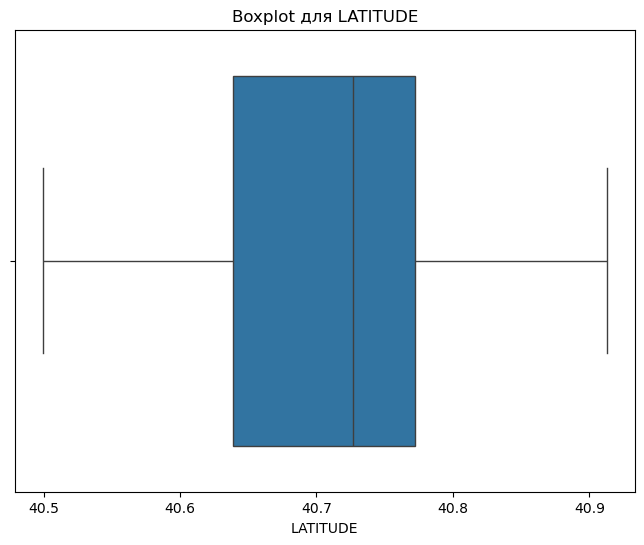

In [100]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['LATITUDE'])
plt.title('Boxplot для LATITUDE')
plt.show()

In [101]:
z_scores = stats.zscore(df['LATITUDE'])

outliers_latitude = df[(z_scores > 3) | (z_scores < -3)]
print(f"Число выбросов в  LATITUDE: {outliers_latitude.shape[0]}")

Число выбросов в  LATITUDE: 0


*Определим наличие выбросов в столбце **LONGITUDE** с использованием Z-оценки*

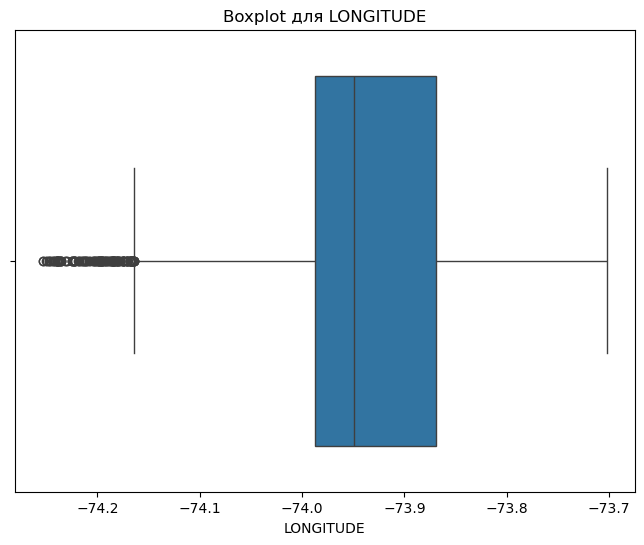

In [103]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['LONGITUDE'])
plt.title('Boxplot для LONGITUDE')
plt.show()

In [104]:
z_scores = stats.zscore(df['LONGITUDE'])

outliers_longitude = df[(z_scores > 3) | (z_scores < -3)]
print(f"Число выбросов в  LONGITUDE: {outliers_longitude.shape[0]}")

Число выбросов в  LONGITUDE: 7


**Обработаем все выбросы, кроме выбросов в таргетной перемнной**

In [106]:
exclude_columns = ['PRICE', 'LATITUDE', 'LONGITUDE']
columns_to_process = [col for col in df.columns if col not in exclude_columns]

**Заменяем значения, выходящие за границы, на медиану**

In [108]:
for column in columns_to_process:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].median()
        df[column] = df[column].apply(lambda x: median_value if x > upper_bound or x < lower_bound else x)

**Задаём примерные границы Нью-Йорка:**

In [110]:
latitude_bounds = (40.4774, 40.9176)
longitude_bounds = (-74.2591, -73.7004)

**Оставляем только те данные, которые входят в границы**

In [112]:
df = df[(df['LATITUDE'].between(*latitude_bounds)) & (df['LONGITUDE'].between(*longitude_bounds))]

In [113]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_price = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Число выбросов в {col}: {outliers_price.shape[0]}")
    z_scores = stats.zscore(df[col])

    outliers_latitude = df[(z_scores > 3) | (z_scores < -3)]
    print(f"Число выбросов в {col}: {outliers_latitude.shape[0]}")

Число выбросов в PRICE: 528
Число выбросов в PRICE: 2
Число выбросов в BEDS: 322
Число выбросов в BEDS: 0
Число выбросов в BATH: 229
Число выбросов в BATH: 134
Число выбросов в PROPERTYSQFT: 0
Число выбросов в PROPERTYSQFT: 0
Число выбросов в LATITUDE: 0
Число выбросов в LATITUDE: 0
Число выбросов в LONGITUDE: 145
Число выбросов в LONGITUDE: 7


**Обработали выбросы**

### ВЫБОР МЕТРИКИ

Mean Absolute Error (MAE): измеряет среднюю абсолютную ошибку. Она показывает, насколько в среднем предсказания модели отклоняются от истинных значений.

Выбираем эту метрику, так как она менее чувствительна к выбросам (в отличие от MSE) значение ошибки проще интерпретируется (чем у MAPE), выражается в тех же единицах, что и целевая переменная.

### ПЕРЕКОДИРОВКА КАТЕГОРИАЛЬНЫХ ДАННЫХ

**В датасете 11 категориалльных столбцов. В зависимости от типа данных определим метод перекодировки**

*Выбираю Target Encoding по своей таргетной переменной PRICE*

In [120]:
import category_encoders as ce

In [121]:
target_column = 'PRICE'
categorical_columns = ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']
X = df[categorical_columns]
y = df[target_column]

In [122]:
encoder = ce.TargetEncoder(cols=categorical_columns)
X_encoded = encoder.fit_transform(X, y)
df_encoded = df.copy()
df_encoded[categorical_columns] = X_encoded
df_encoded.head()

BROKERTITLE          TYPE      PRICE  BEDS      BATH  PROPERTYSQFT  \
0  3.139974e+06  2.615780e+06     315000   2.0  2.000000   1400.000000   
1  9.355128e+06  2.615780e+06  195000000   7.0  2.000000   2175.076593   
2  6.666477e+05  3.786544e+06     260000   4.0  2.000000   2015.000000   
3  2.880531e+06  2.615780e+06      69000   3.0  1.000000    445.000000   
4  7.979676e+06  6.406234e+06   55000000   7.0  2.373861   2175.076593   

        ADDRESS         STATE  MAIN_ADDRESS  ADMINISTRATIVE_AREA_LEVEL_2  \
0  2.112345e+06  2.399755e+06  2.112345e+06                 3.026231e+06   
1  2.744251e+07  8.679550e+06  2.744251e+07                 3.223616e+06   
2  2.105189e+06  1.124853e+06  2.105189e+06                 3.223616e+06   
3  2.080339e+06  2.066934e+06  2.080339e+06                 3.223616e+06   
4  9.227327e+06  8.032398e+06  9.227327e+06                 3.223616e+06   

       LOCALITY   SUBLOCALITY   STREET_NAME     LONG_NAME  FORMATTED_ADDRESS  \
0  3.227004e+06  3.026231e+06  2.434554e+06  2.434554e+06       2.112345e+06   
1  3.227004e+06  1.018691e+07  1.020983e+07  2.744251e+07       2.744251e+07   
2  3.227004e+06  5.600220e+06  5.600220e+06  2.152271e+06       2.105189e+06   
3  3.227004e+06  1.018691e+07  1.020983e+07  2.273845e+06       2.062479e+06   
4  3.227004e+06  1.018691e+07  1.020983e+07  5.520136e+06       9.227327e+06   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   float64
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

In [124]:
df.shape

(4587, 17)

In [125]:
df.select_dtypes(include='object').columns

Index(['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
       'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME',
       'LONG_NAME', 'FORMATTED_ADDRESS'],
      dtype='object')

In [126]:
df.drop(['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
       'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME',
       'LONG_NAME', 'FORMATTED_ADDRESS'], axis=1, inplace=True)

In [127]:
df.head()

PRICE  BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0     315000   2.0  2.000000   1400.000000  40.761255 -73.974483
1  195000000   7.0  2.000000   2175.076593  40.766393 -73.980991
2     260000   4.0  2.000000   2015.000000  40.541805 -74.196109
3      69000   3.0  1.000000    445.000000  40.761398 -73.974613
4   55000000   7.0  2.373861   2175.076593  40.767224 -73.969856

*Обоснование выбора метода Target Encoding*: главным фактором при выборе именно этого метода перекодирования большое количество уникальных значений в категориальных столбцах.

### Разбивка данных

In [130]:
y = df['PRICE']
y[:10]

0       315000
1    195000000
2       260000
3        69000
4     55000000
5       690000
6       899500
7     16800000
8       265000
9       440000
Name: PRICE, dtype: int64

In [131]:
X = df.drop(['PRICE'], axis=1)
X.head()

BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0   2.0  2.000000   1400.000000  40.761255 -73.974483
1   7.0  2.000000   2175.076593  40.766393 -73.980991
2   4.0  2.000000   2015.000000  40.541805 -74.196109
3   3.0  1.000000    445.000000  40.761398 -73.974613
4   7.0  2.373861   2175.076593  40.767224 -73.969856

In [132]:
corr_matrix = df.corr()
corr_matrix

PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.076909  0.085929      0.033057 -0.021103  -0.054685
BEDS          0.076909  1.000000  0.581826      0.398482 -0.093973  -0.016979
BATH          0.085929  0.581826  1.000000      0.435550 -0.080592  -0.073743
PROPERTYSQFT  0.033057  0.398482  0.435550      1.000000  0.002412   0.027091
LATITUDE     -0.021103 -0.093973 -0.080592      0.002412  1.000000   0.515180
LONGITUDE    -0.054685 -0.016979 -0.073743      0.027091  0.515180   1.000000

In [133]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot=True);

**Вывод: все коэффициенты корреляции между этими признаками находятся в допустимых пределах, мультиколлинеарность отсутствует. Принимаем решение оставить все признаки**

*Для разбивки данных выбрана **отложенная выборка:** данные делятся на две части: тренировочную (75%) и тестовую (25%)&* 

*Такой метод подвержен меньшему риску переобучения и результаты будут проще для интерпретации*

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [137]:
X_train.shape, X_test.shape

((3440, 5), (1147, 5))

In [138]:
y_train.shape, y_test.shape

((3440,), (1147,))

### Предобработка данных

In [140]:
X_train.describe()

BEDS         BATH  PROPERTYSQFT     LATITUDE    LONGITUDE
count  3440.000000  3440.000000   3440.000000  3440.000000  3440.000000
mean      3.011005     2.185252   1791.746122    40.714912   -73.941466
std       1.399737     1.211731    671.002118     0.087839     0.101223
min       1.000000     0.000000    250.000000    40.499798   -74.253033
25%       2.000000     1.000000   1200.000000    40.639576   -73.986683
50%       3.000000     2.000000   2175.076593    40.727720   -73.948744
75%       3.368944     2.373861   2184.207862    40.773469   -73.869652
max       7.000000     6.000000   3536.000000    40.912729   -73.702450

*Линейная регрессия (будет использована в качестве простой модели) чувствительна к масштабу признаков, что может привести к некорректной работе алгоритмов и снижению качества модели.* 

**Признаки в датасете имеют разные масштабы, поэтому в качестви метода предобработки данных была выбрана *стандартизация* (StandardScaler).**

In [142]:
scaler = StandardScaler()

In [143]:
feature_names = X_test.columns.to_list()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [144]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

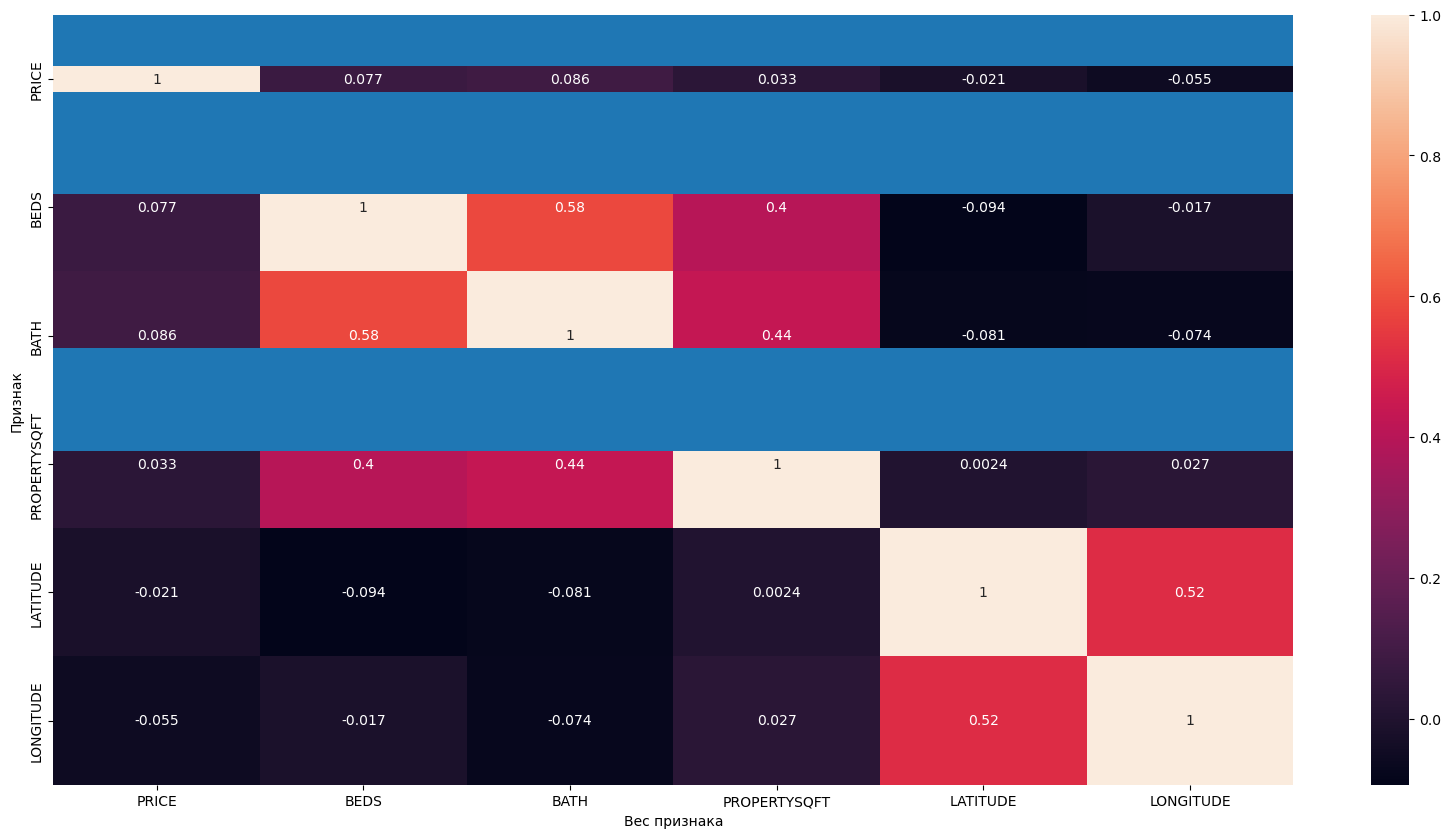

In [145]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [146]:
X_train.head()

BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
1493   3.0  4.000000   1424.000000  40.552359 -74.140760
4501   3.0  2.000000   2175.076593  40.738597 -73.995177
1535   3.0  2.000000   2184.207862  40.674276 -73.962613
1805   3.0  2.373861   2184.207862  40.887929 -73.909666
2184   7.0  5.000000   2184.207862  40.627685 -73.918487

In [147]:
X_train.describe()

BEDS         BATH  PROPERTYSQFT     LATITUDE    LONGITUDE
count  3440.000000  3440.000000   3440.000000  3440.000000  3440.000000
mean      3.011005     2.185252   1791.746122    40.714912   -73.941466
std       1.399737     1.211731    671.002118     0.087839     0.101223
min       1.000000     0.000000    250.000000    40.499798   -74.253033
25%       2.000000     1.000000   1200.000000    40.639576   -73.986683
50%       3.000000     2.000000   2175.076593    40.727720   -73.948744
75%       3.368944     2.373861   2184.207862    40.773469   -73.869652
max       7.000000     6.000000   3536.000000    40.912729   -73.702450

In [148]:
X_train_scaled.head()

BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
0 -0.007864  1.497866     -0.548135 -1.850860  -1.969156
1 -0.007864 -0.152904      0.571364  0.269678  -0.530703
2 -0.007864 -0.152904      0.584974 -0.462694  -0.208946
3 -0.007864  0.155675      0.584974  1.969990   0.314207
4  2.850231  2.323252      0.584974 -0.993186   0.227047

In [149]:
X_train_scaled.describe()

BEDS          BATH  PROPERTYSQFT      LATITUDE     LONGITUDE
count  3.440000e+03  3.440000e+03  3.440000e+03  3.440000e+03  3.440000e+03
mean   5.370381e-17 -1.239319e-17 -4.647445e-17 -6.289129e-14  2.440477e-14
std    1.000145e+00  1.000145e+00  1.000145e+00  1.000145e+00  1.000145e+00
min   -1.436911e+00 -1.803675e+00 -2.298011e+00 -2.449325e+00 -3.078488e+00
25%   -7.223872e-01 -9.782900e-01 -8.820123e-01 -8.577892e-01 -4.467789e-01
50%   -7.863558e-03 -1.529045e-01  5.713636e-01  1.458314e-01 -7.191163e-02
75%    2.557555e-01  1.556748e-01  5.849740e-01  6.667301e-01  7.095644e-01
max    2.850231e+00  3.148637e+00  2.599854e+00  2.252377e+00  2.361634e+00

### Построение базовой модели

**В качестве базовой модели возьмём DummyRegressor.** 

*Стратегия **"mean"** означает, что модель будет всегда возвращать среднее значение целевой переменной **y** при предсказаниях.*

In [152]:
dummy_model = DummyRegressor(strategy='mean')  

dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2190640.22770473


In [153]:
check_test_dummy = pd.DataFrame({
    "y_test": y_test,
    "y_pred_dummy": y_pred,  
})

check_test_dummy.head(10)

y_test  y_pred_dummy
4718    599000  2.563003e+06
753     629000  2.563003e+06
2754   1389000  2.563003e+06
2404    149999  2.563003e+06
3971    599888  2.563003e+06
3316    990000  2.563003e+06
69    65000000  2.563003e+06
1986    375000  2.563003e+06
486     184888  2.563003e+06
4536   2250000  2.563003e+06

### Построение простой модели

**В качестве простой модели построим линейную регрессию (Linear Regression)**

In [156]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds_lr)}')

Mean Absolute Error: 3187567.6684417864


In [157]:
check_test_lr = pd.DataFrame({
    "y_test": y_test,
    "y_pred_lr": y_preds_lr, 
})

check_test_lr.head(10)

y_test     y_pred_lr
4718    599000 -1.261670e+06
753     629000  2.894401e+06
2754   1389000  3.903787e+06
2404    149999 -2.630977e+06
3971    599888 -3.257074e+06
3316    990000  1.518691e+06
69    65000000  3.858348e+06
1986    375000 -3.338945e+06
486     184888 -1.313863e+06
4536   2250000  1.406854e+06

**Вывод: линейная регрессия повысила МАЕ, точность предсказаний оказалась выше в MAE (где-то ниже, но это незначительно). Делаем вывод, что базовая модель предсказала лучше.**